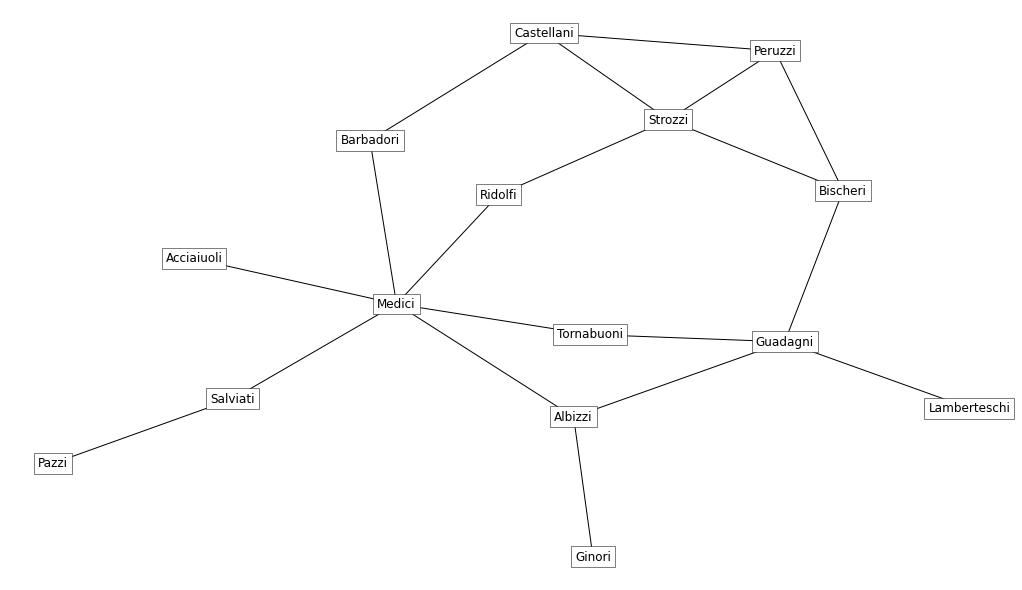

['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']


In [59]:
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

# limits = plt.axis("off")  

plt.figure(figsize=(14,8))
G = nx.florentine_families_graph()
G.remove_edge("Ridolfi", "Tornabuoni")

nx.draw(G, with_labels=True, node_size=0,bbox=dict(facecolor="white", edgecolor='black'), pos = nx.kamada_kawai_layout(G))
plt.show()

families = G.nodes
print(families)


In [60]:
W = nx.adjacency_matrix(G).todense()   # weight matrix
df = pd.DataFrame(W, columns = families, index=families)
w = df.sum(axis = 0)   # degree vector
P = np.diag(1/w)*W    
P = pd.DataFrame(P, columns = families, index=families)
P

,Acciaiuoli,Medici,Castellani,Peruzzi,Strozzi,Barbadori,Ridolfi,Tornabuoni,Albizzi,Salviati,Pazzi,Bischeri,Guadagni,Ginori,Lamberteschi
Acciaiuoli,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
Medici,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.0,0.000000,0.000000,0.000000,0.00
Castellani,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
Peruzzi,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.00
Strozzi,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.00
Barbadori,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
Ridolfi,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
Tornabuoni,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.00
Albizzi,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.333333,0.00
Salviati,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.00


In [61]:
pi = w/(2*G.number_of_edges())
print(f"invariant distribution of the graph: \n{pi}")
x_zero = pd.Series(np.zeros(G.number_of_nodes()), index = w.index)
x_zero["Medici"] = 1
x_zero["Strozzi"] = -1
print(f"\ninitial conditions:\n{x_zero}")
x_bar = pi@x_zero
print(f"\nvalue of asymptotic consensus {x_bar:.4f}")

invariant distribution of the graph: 
Acciaiuoli      0.026316
Medici          0.157895
Castellani      0.078947
Peruzzi         0.078947
Strozzi         0.105263
Barbadori       0.052632
Ridolfi         0.052632
Tornabuoni      0.052632
Albizzi         0.078947
Salviati        0.052632
Pazzi           0.026316
Bischeri        0.078947
Guadagni        0.105263
Ginori          0.026316
Lamberteschi    0.026316
dtype: float64

initial conditions:
Acciaiuoli      0.0
Medici          1.0
Castellani      0.0
Peruzzi         0.0
Strozzi        -1.0
Barbadori       0.0
Ridolfi         0.0
Tornabuoni      0.0
Albizzi         0.0
Salviati        0.0
Pazzi           0.0
Bischeri        0.0
Guadagni        0.0
Ginori          0.0
Lamberteschi    0.0
dtype: float64

value of asymptotic consensus 0.0526


In [62]:
stubborn_families = []
regular_families = [f for f in families if f not in stubborn_families]

Q = P[regular_families].loc[regular_families]
E = P[stubborn_families].loc[regular_families]

# ic = np.random.uniform(0,1,len(regular_families))
initial_conditions = x_zero.copy()

# Set the initial condition for the dynamics
n_nodes = len(G)
u = [1,-1]

n_iter= 500
x = pd.DataFrame(np.zeros((n_nodes,n_iter)), index=families)
x.loc[stubborn_families,0]  = x_zero[stubborn_families];
x.loc[regular_families,0]  = x_zero[regular_families];

# Evolve the opinion vector
for t in range(1,n_iter):
    x.loc[regular_families, t] = Q @ x.loc[regular_families, t-1] + E @ x.loc[stubborn_families, t-1]
    x.loc[stubborn_families, t] = x.loc[stubborn_families, t-1];

x.loc[:,t]

Acciaiuoli      0.052632
Medici          0.052632
Castellani      0.052632
Peruzzi         0.052632
Strozzi         0.052632
Barbadori       0.052632
Ridolfi         0.052632
Tornabuoni      0.052632
Albizzi         0.052632
Salviati        0.052632
Pazzi           0.052632
Bischeri        0.052632
Guadagni        0.052632
Ginori          0.052632
Lamberteschi    0.052632
Name: 499, dtype: float64

In [63]:
stubborn_families = ["Medici", "Strozzi"]
regular_families = [f for f in families if f not in stubborn_families]

Q = P[regular_families].loc[regular_families]
E = P[stubborn_families].loc[regular_families]

# Set the initial condition for the dynamics
n_nodes = len(G)
n_iter= 50
x = pd.DataFrame(np.zeros((n_nodes,n_iter)), index=families)
x.loc[stubborn_families,0]  = x_zero[stubborn_families];
x.loc[regular_families,0]  = x_zero[regular_families];

# Evolve the opinion vector
for t in range(1,n_iter):
    x.loc[regular_families, t] = Q @ x.loc[regular_families, t-1] + E @ x.loc[stubborn_families, t-1]
    x.loc[stubborn_families, t] = x.loc[stubborn_families, t-1];

x.loc[:,t]

Acciaiuoli      1.000000
Medici          1.000000
Castellani     -0.454547
Peruzzi        -0.636366
Strozzi        -1.000000
Barbadori       0.272726
Ridolfi         0.000000
Tornabuoni      0.636359
Albizzi         0.636358
Salviati        1.000000
Pazzi           1.000000
Bischeri       -0.454549
Guadagni        0.272718
Ginori          0.636354
Lamberteschi    0.272719
Name: 49, dtype: float64

In [64]:
# Define stubborns and regular nodes
stubborn_families = ["Medici", "Strozzi", "Guadagni", "Castellani"]
regular_families = [f for f in families if f not in stubborn_families]
u = [1, -1, -1, -1]

# define vector of initial conditions/opinions
x_zero = pd.Series(np.zeros(G.number_of_nodes()), index = w.index)
x_zero.loc[stubborn_families] =u

# defining reduced matrices
Q = P[regular_families].loc[regular_families]
E = P[stubborn_families].loc[regular_families]

# defining matrix x to store evolution of opinions
n_nodes = len(G)
n_iter= 50
x = pd.DataFrame(np.zeros((n_nodes,n_iter)), index=families)
x.loc[stubborn_families,0]  = x_zero[stubborn_families];
x.loc[regular_families,0]  = x_zero[regular_families];

# Evolve the opinion vector
for t in range(1,n_iter):
    x.loc[regular_families, t] = Q @ x.loc[regular_families, t-1] + E @ x.loc[stubborn_families, t-1]
    x.loc[stubborn_families, t] = x.loc[stubborn_families, t-1];

x.loc[:,t]

Acciaiuoli      1.0
Medici          1.0
Castellani     -1.0
Peruzzi        -1.0
Strozzi        -1.0
Barbadori       0.0
Ridolfi         0.0
Tornabuoni      0.0
Albizzi         0.0
Salviati        1.0
Pazzi           1.0
Bischeri       -1.0
Guadagni       -1.0
Ginori          0.0
Lamberteschi   -1.0
Name: 49, dtype: float64

In [65]:
np.mean(x.loc[:,t])

-0.13333333929379781

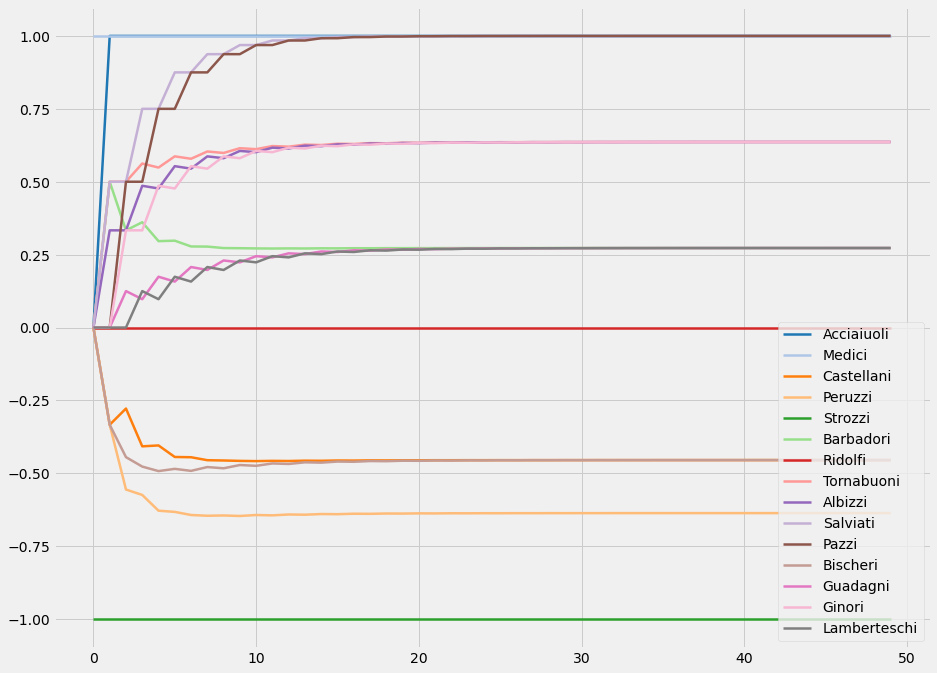

In [45]:
# sns.set()
# sns.color_palette("Paired")
styles = ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
styles = np.array(styles)


plt.style.use("fivethirtyeight")
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
plt.figure(figsize = (14, 11))
a = np.linspace(0,1,x.shape[0])
plt.ylim(-1.1,1.1)
for i, family in enumerate(families):
    trajectory = x.loc[family,:]
    plt.plot(trajectory, label=family, lw=2.5)
plt.legend(loc='lower right')
# ax.legend()

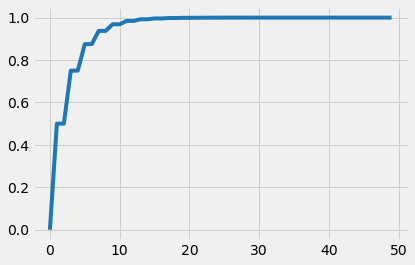

0     0.000000
1     0.500000
2     0.500000
3     0.750000
4     0.750000
5     0.875000
6     0.875000
7     0.937500
8     0.937500
9     0.968750
10    0.968750
11    0.984375
12    0.984375
13    0.992188
14    0.992188
15    0.996094
16    0.996094
17    0.998047
18    0.998047
19    0.999023
20    0.999023
21    0.999512
22    0.999512
23    0.999756
24    0.999756
25    0.999878
26    0.999878
27    0.999939
28    0.999939
29    0.999969
30    0.999969
31    0.999985
32    0.999985
33    0.999992
34    0.999992
35    0.999996
36    0.999996
37    0.999998
38    0.999998
39    0.999999
40    0.999999
41    1.000000
42    1.000000
43    1.000000
44    1.000000
45    1.000000
46    1.000000
47    1.000000
48    1.000000
49    1.000000
Name: Salviati, dtype: float64

In [46]:
plt.plot(x.loc["Salviati",:])
plt.show()
x.loc["Salviati",:]

In [47]:
stubborn_families = ["Medici", "Strozzi", "Castellani", "Guadagni"]
regular_families = [f for f in families if f not in stubborn_families]
u = [1, -1, -1, -1]

x_zero=pd.Series(np.zeros(G.number_of_nodes()), index=w.index)
x_zero.loc[stubborn_families]=u

Q = P[regular_families].loc[regular_families]
E = P[stubborn_families].loc[regular_families]

# ic = np.random.uniform(0,1,len(regular_families))
initial_conditions = x_zero.copy()

# Set the initial condition for the dynamics
n_nodes = len(G)

n_iter= 100
x = pd.DataFrame(np.zeros((n_nodes,n_iter)), index=families)
x.loc[stubborn_families,0]  = x_zero[stubborn_families];
x.loc[regular_families,0]  = x_zero[regular_families];

# Evolve the opinion vector
for t in range(1,n_iter):
    x.loc[regular_families, t] = Q @ x.loc[regular_families, t-1] + E @ x.loc[stubborn_families, t-1]
    x.loc[stubborn_families, t] = x.loc[stubborn_families, t-1];

x.loc[:,t]

Acciaiuoli      1.0
Medici          1.0
Castellani     -1.0
Peruzzi        -1.0
Strozzi        -1.0
Barbadori       0.0
Ridolfi         0.0
Tornabuoni      0.0
Albizzi         0.0
Salviati        1.0
Pazzi           1.0
Bischeri       -1.0
Guadagni       -1.0
Ginori          0.0
Lamberteschi   -1.0
Name: 99, dtype: float64

In [48]:
stubborn_families = ["Medici", "Strozzi", "Castellani", "Guadagni"]
regular_families = [f for f in families if f not in stubborn_families]
u = [1, -1, -1, -1]

x_zero=pd.Series(np.zeros(G.number_of_nodes()), index=w.index)
x_zero = np.random.rand(G.number_of_nodes())
# x_zero.loc[stubborn_families]=u
beta = 0.15
mu = np.ones(n_nodes)/n_nodes

a = P.values

z = (1 - beta)*P.values.T@x_zero + beta*mu
for i in range(100):
    z = (1 - beta)*P.values.T@z + beta*mu

z = pd.Series(z, index = families)
z

Acciaiuoli      0.031824
Medici          0.154051
Castellani      0.071658
Peruzzi         0.070187
Strozzi         0.092318
Barbadori       0.052127
Ridolfi         0.051442
Tornabuoni      0.053848
Albizzi         0.082126
Salviati        0.063129
Pazzi           0.036830
Bischeri        0.071527
Guadagni        0.103641
Ginori          0.033269
Lamberteschi    0.032024
dtype: float64

In [49]:
nx.pagerank(G)

{'Acciaiuoli': 0.031824149090974446,
 'Medici': 0.15405001340865293,
 'Castellani': 0.07165770456948056,
 'Peruzzi': 0.07018669768905662,
 'Strozzi': 0.09231779767919304,
 'Barbadori': 0.05212720844546092,
 'Ridolfi': 0.05144178287923768,
 'Tornabuoni': 0.053847957717114946,
 'Albizzi': 0.08212695905832182,
 'Salviati': 0.06312994200096989,
 'Pazzi': 0.036829744373448464,
 'Bischeri': 0.07152768304944948,
 'Guadagni': 0.10363968342248672,
 'Ginori': 0.03326886799001193,
 'Lamberteschi': 0.0320238086261405}

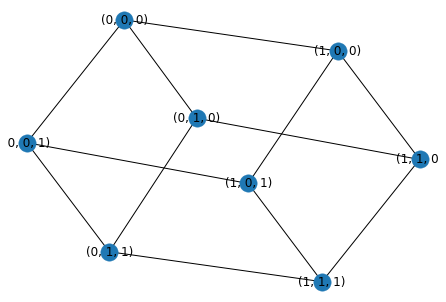

In [50]:
# Number of iterations
n_iter = 50;
final_opinions = dict()
average_opinion = dict() 

cube = nx.hypercube_graph(3)
nx.draw(cube, with_labels=True,)
plt.show()



In [55]:
indices = {ind: i for i, ind in enumerate(cube.nodes)}
n_nodes = cube.number_of_nodes()
u = [0,1]

for i in cube.nodes:
    
    # skip stubborn node
    if i == (0,0,0):
        continue
        
    # defining stubborn and regular nodes and indices
    stubborn = [(0,0,0), i];
    stubborn_id = [indices.get(key) for key in stubborn]
    regular = [node for node in cube.nodes if node not in stubborn]
    regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
    
    # P matrix
    Adj = nx.adjacency_matrix(cube).toarray() # retrieve adjacency matrix
    degrees = np.sum(Adj,axis=1)              # degree vector
    P = np.diag(1/degrees) @ Adj              # normalized weight vector

    # Submatrices
    Q = P[np.ix_(regular_id, regular_id)]     # restriction regular x regular
    E = P[np.ix_(regular_id, stubborn_id)]    # restriction regular x stubborns

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros(n_nodes)
    x[stubborn_id] = u;
    x[regular_id] = ic;

    for t in range(1,n_iter):
        x[regular_id] = Q @ x[regular_id] + E @ x[stubborn_id]
        x[stubborn_id] = x[stubborn_id];

    final_opinions[i] = x
    average_opinion[i] = np.average(final_opinions[i])
    print("Stubborn nodes:", stubborn)
    print(f"Average opinion: {average_opinion[i]:.5f}", )

Stubborn nodes: [(0, 0, 0), (0, 0, 1)]
Average opinion: 0.50000
Stubborn nodes: [(0, 0, 0), (0, 1, 0)]
Average opinion: 0.50000
Stubborn nodes: [(0, 0, 0), (0, 1, 1)]
Average opinion: 0.50000
Stubborn nodes: [(0, 0, 0), (1, 0, 0)]
Average opinion: 0.50000
Stubborn nodes: [(0, 0, 0), (1, 0, 1)]
Average opinion: 0.50000
Stubborn nodes: [(0, 0, 0), (1, 1, 0)]
Average opinion: 0.50000
Stubborn nodes: [(0, 0, 0), (1, 1, 1)]
Average opinion: 0.50000


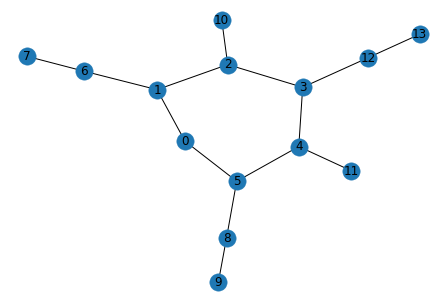

In [56]:
# Number of iterations
n_iter = 100;
final_opinions = dict()
average_opinion = dict() 

cycle = nx.cycle_graph(6)
cycle.add_edge(1, 6)
cycle.add_edge(6, 7)
cycle.add_edge(5, 8)
cycle.add_edge(8, 9)
cycle.add_edge(2, 10)
cycle.add_edge(4, 11)
cycle.add_edge(3, 12)
cycle.add_edge(12, 13)
nx.draw(cycle, with_labels=True)
plt.show()

In [57]:

n_nodes = cycle.number_of_nodes()
for i in cycle.nodes:
    # Position (0,0) is occupied by the 0-stubborn node
    if i ==0:
        continue
        
    # Stubborn and regular nodes
    stubborn_id = [0, i];
    regular_id = [node for node in cycle.nodes if node not in stubborn_id]

    print("Stubborn nodes:", stubborn_id)

    # Input to stubborn nodes
    u = [0,1]


    # P matrix
    A = nx.adjacency_matrix(cycle) # -> return type is scipy.sparse.csr_matrix
    A = A.toarray() # convert A to a numpy array
    degrees = np.sum(A,axis=1)
    P = np.diag(1/degrees) @ A

    # Submatrices
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular_id))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;

    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];

    final_opinions[i] = x[:,n_iter-1]
    average_opinion[i] = np.average(final_opinions[i])
    print("Average opinion:", average_opinion[i])

Stubborn nodes: [0, 1]
Average opinion: 0.5572401163725338
Stubborn nodes: [0, 2]
Average opinion: 0.5357161420161792
Stubborn nodes: [0, 3]
Average opinion: 0.547619045831526
Stubborn nodes: [0, 4]
Average opinion: 0.5357140582018326
Stubborn nodes: [0, 5]
Average opinion: 0.5571430609102224
Stubborn nodes: [0, 6]
Average opinion: 0.3316560030830048
Stubborn nodes: [0, 7]
Average opinion: 0.24029760314321216
Stubborn nodes: [0, 8]
Average opinion: 0.3315490043859787
Stubborn nodes: [0, 9]
Average opinion: 0.2402069336625948
Stubborn nodes: [0, 10]
Average opinion: 0.3367952915236616
Stubborn nodes: [0, 11]
Average opinion: 0.3367728062138823
Stubborn nodes: [0, 12]
Average opinion: 0.38571471525717865
Stubborn nodes: [0, 13]
Average opinion: 0.2959327538342362


In [110]:
for i in range(1, len(final_opinions)+1):
    print(f"stubborn placed in node {i}: {final_opinions[i]}")

stubborn placed in node 1: [0.         1.         0.7998635  0.60006155 0.39977914 0.20003804
 1.         1.         0.19981594 0.20005188 0.80003847 0.40006225
 0.59970218 0.60008394]
stubborn placed in node 2: [0.         0.5        1.         0.74999744 0.49999438 0.24999744
 0.5        0.5        0.24999353 0.24999589 1.         0.49999643
 0.74999353 0.74999589]
stubborn placed in node 3: [0.         0.33333334 0.6666667  1.         0.66666671 0.33333331
 0.33333342 0.33333335 0.33333346 0.33333328 0.66666667 0.66666665
 1.         1.        ]
stubborn placed in node 4: [0.         0.24999509 0.50000774 0.74999509 1.         0.5
 0.25000891 0.24999211 0.5        0.5        0.49999315 1.
 0.75000891 0.74999211]
stubborn placed in node 5: [0.         0.19999685 0.40002013 0.5999949  0.80001244 1.
 0.20001678 0.19999571 1.         1.         0.39999485 0.79999681
 0.60002715 0.59999305]
stubborn placed in node 6: [0.         0.45454002 0.36438117 0.27270578 0.1827419  0.09089719
 1. 